## Import Libraries

In [256]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob
from keras.preprocessing import image
from scipy import spatial
%matplotlib notebook

---

# 8.1 Prepare feature for Main image and Tile image

## 8.1.1 Prepare main image feature

<IPython.core.display.Javascript object>


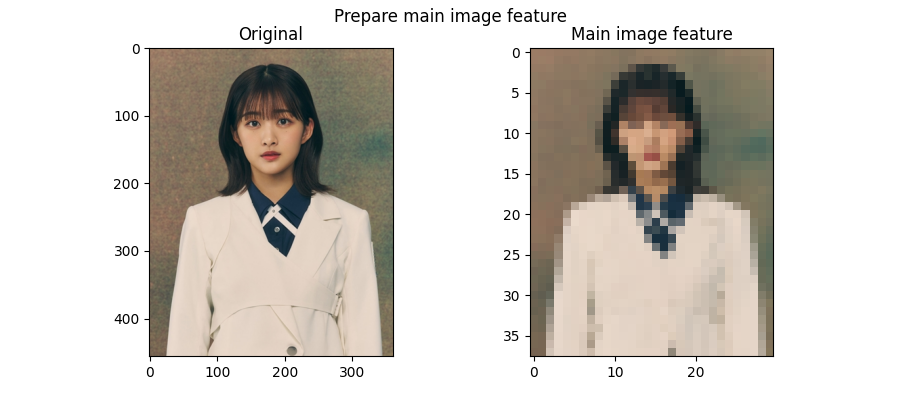

In [320]:
#1. Load main image
main_image = plt.imread('./harada2.jpg')


#2. Define tile size
tile_size = np.zeros((12, 12), dtype=np.uint8)

#calculate width,height of main_image_feature
width = int(main_image.shape[1]/tile_size.shape[1])
height = int(main_image.shape[0]/tile_size.shape[0])
main_image_feature = np.zeros((height, width, 3), dtype=np.uint8)


#3. Create main image feature grid of subimage
#Calculate average (mean) color of each subimage with tile_size

for i in range(height):
    for j in range(width):
        main_image_feature[i, j] = main_image[i*tile_size.shape[0] : (i+1)*tile_size.shape[0], 
                                              j*tile_size.shape[1] : (j+1)*tile_size.shape[1]].mean(axis=(0,1))
    
#4. Display Image
fig = plt.figure(figsize=(9, 4))
fig.suptitle("Prepare main image feature")
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.title('Original')
plt.imshow(main_image)

fig.add_subplot(rows, columns, 2)
plt.title('Main image feature')
plt.imshow(main_image_feature)
plt.show()

## 8.1.2 Prepare tile imags and features

In [313]:
#1. Collect filenames of all tile images
all_files = glob.glob('./Data/pexels_mini/*.jpg')

#2. Load tile image and resize to tile_size
tiles = []
for i in range(len(all_files)):
    tile = image.load_img(all_files[i], target_size=(tile_size.shape[0], tile_size.shape[1]))
    tiles.append(tile)

#3. Create array of average (mean) color of each tile image
tile_features = []
for tile in tiles:
    mean_color = np.array(tile).mean(axis=(0,1))
    tile_features.append(mean_color)

In [314]:
for i in range(5):
    print("tile_features[%s]=" %i, tile_features[i])

tile_features[0]= [147.58333333 144.55555556 152.64583333]
tile_features[1]= [234.70138889 185.61111111  11.1875    ]
tile_features[2]= [70.18055556 59.38888889 54.56944444]
tile_features[3]= [249.02083333 220.14583333 147.97222222]
tile_features[4]= [206.71527778 174.88888889 172.26388889]


---

# 8.2 Image Clustering and Matching using KNN with KDTree Algorithm

## 8.2.1 Image Clustering and Matching with KNN (KDTree)

<IPython.core.display.Javascript object>


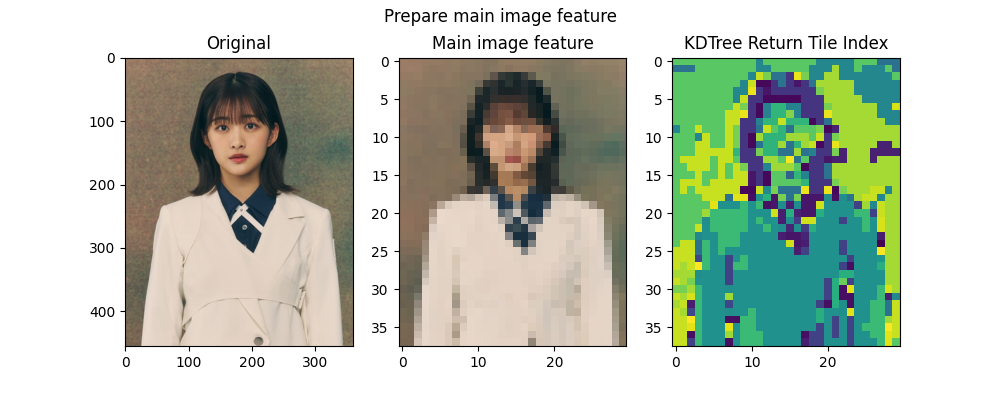

In [329]:
#1. Create KDTree of tile color features
tree = spatial.KDTree(tile_features)


#2. KNN (k=1) search for best matched tiles with each subimage
closest_tiles = np.zeros((height, width, 3), dtype=np.uint8)
for i in range(height):
    for j in range(width):
        closest = tree.query(main_image_feature[i, j])
        closest_tiles[i, j] = closest[1]

    
#3. Display Image
fig = plt.figure(figsize=(10, 4))
fig.suptitle("Prepare main image feature")
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.title('Original')
plt.imshow(main_image)

fig.add_subplot(rows, columns, 2)
plt.title('Main image feature')
plt.imshow(main_image_feature)

fig.add_subplot(rows, columns, 3)
plt.title('KDTree Return Tile Index')
plt.imshow(closest_tiles[:,:,0], cmap='viridis')
plt.show()

---

# 8.3 Create Image Mosaic

<IPython.core.display.Javascript object>


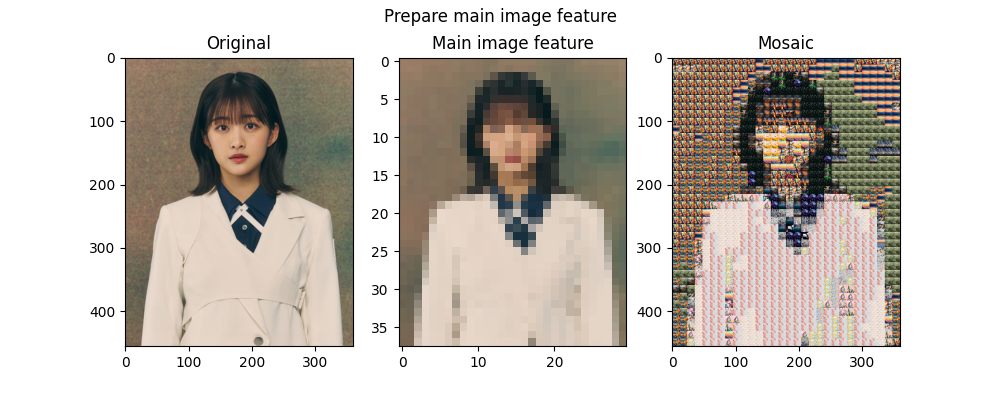

In [328]:
#1. Fill each subimage with matched tile
main_photo = np.zeros((main_image.shape[0], main_image.shape[1], 3), dtype=np.uint8)

for i in range(main_image_feature.shape[0]):
    for j in range(main_image_feature.shape[1]):
        #Offset of tile
        x, y = i*tile_size.shape[0], j*tile_size.shape[1]

        #Index of tile
        index = closest_tiles[i, j, 0]
        main_photo[x:int(x+tile_size.shape[0]), y:int(y+tile_size.shape[1]), :] = tiles[index]
        
#2. Display Image
fig = plt.figure(figsize=(10, 4))
fig.suptitle("Prepare main image feature")
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.title('Original')
plt.imshow(main_image)

fig.add_subplot(rows, columns, 2)
plt.title('Main image feature')
plt.imshow(main_image_feature)

# fig.add_subplot(rows, columns, 3)
# plt.title('KDTree Return Tile Index')
# plt.imshow(closest_tiles[:,:,0], cmap='viridis')

fig.add_subplot(rows, columns, 3)
plt.title('Mosaic')
plt.imshow(main_photo)
plt.show()